# Import Libraries

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score
import joblib


Pandas -> For working with data and dataframes
Numpy -> For performing numerical operations like numpy 1D, 2D array etc.
Matplotlib and Seaborn -> For data visualization
Sklearn -> For performing statistical approaches and for using ML algorithms
Joblib -> To save and load ML models

# Load Olympic Datasets

In [60]:
df_results = pd.read_csv("Olympic_Swimming_Results_1912to2020.csv")

In [61]:
df_results.head()

,Location,Year,Distance (in meters),Stroke,Relay?,Gender,Team,Athlete,Results,Rank
0,Tokyo,2020,100m,Backstroke,0,Men,ROC,Evgeny Rylov,51.98,1
1,Tokyo,2020,100m,Backstroke,0,Men,ROC,Kliment Kolesnikov,52,2
2,Tokyo,2020,100m,Backstroke,0,Men,USA,Ryan Murphy,52.19,3
3,Tokyo,2020,100m,Backstroke,0,Men,ITA,Thomas Ceccon,52.3,4
4,Tokyo,2020,100m,Backstroke,0,Men,CHN,Jiayu Xu,52.51,4


In [62]:
df_athletes = pd.read_csv("olympic_athletes.csv")

In [63]:
df_athletes.head()

,athlete_url,athlete_full_name,games_participations,first_game,athlete_year_birth,athlete_medals,bio
0,https://olympics.com/en/athletes/cooper-woods-...,Cooper WOODS-TOPALOVIC,1,Beijing 2022,2000.0,NaN,NaN
1,https://olympics.com/en/athletes/elofsson,Felix ELOFSSON,2,PyeongChang 2018,1995.0,NaN,NaN
2,https://olympics.com/en/athletes/dylan-walczyk,Dylan WALCZYK,1,Beijing 2022,1993.0,NaN,NaN
3,https://olympics.com/en/athletes/olli-penttala,Olli PENTTALA,1,Beijing 2022,1995.0,NaN,NaN
4,https://olympics.com/en/athletes/reikherd,Dmitriy REIKHERD,1,Beijing 2022,1989.0,NaN,NaN


The below code which is executed once and commented. It fetches the athlete's birth year from second dataset for the athletes names common in both dataset

In [67]:
# athlete_years = []

# for index, row in df_results.iterrows():
#     athlete_year_birth = 0
#     athlete_name = row['Athlete']
#     if not pd.isnull(athlete_name):
#         athlete_name = athlete_name.lower()
#     else:
#         athlete_name = 'nan'
#     athlete_info = df_athletes[df_athletes['athlete_full_name'].str.lower() == athlete_name]
    
#     if not athlete_info.empty:
#         athlete_year_birth = athlete_info.iloc[0]['athlete_year_birth']
#     else:
#         athlete_year_birth = float('nan')
        
#     if not pd.isnull(athlete_year_birth):
#         athlete_year_birth = int(athlete_year_birth)
#     else:
#         athlete_year_birth = float('nan')
        
#     print(index, athlete_name, " --> ", athlete_year_birth)
    
#     athlete_years.append(athlete_year_birth)

0 evgeny rylov  -->  1996
1 kliment kolesnikov  -->  2000
2 ryan murphy  -->  1995
3 thomas ceccon  -->  nan
4 jiayu xu  -->  1995
5 hugo gonzalez de oliveira  -->  1999
6 mitchell larkin  -->  1993
7 robert glinta  -->  1997
8 adam peaty  -->  1994
9 arno kamminga  -->  1995
10 nicolo martinenghi  -->  1999
11 michael andrew  -->  nan
12 james wilby  -->  1993
13 zibei yan  -->  1995
14 andrew wilson  -->  1993
15 ilya shymanovich  -->  1994
16 caeleb dressel  -->  1996
17 kristof kristof milak  -->  2000
18 noe ponti  -->  nan
19 andrei minakov  -->  2002
20 jakub majerski  -->  nan
21 matthew temple  -->  1999
22 luis martinez  -->  1995
23 josif miladinov  -->  2003
24 caeleb dressel  -->  1996
25 kyle chalmers  -->  1998
26 kliment kolesnikov  -->  2000
27 maxime grousset  -->  1999
28 sunwoo hwang  -->  2003
29 alessandro miressi  -->  1998
30 david popovici  -->  2004
31 nandor nemeth  -->  1999
32 robert finke  -->  1999
33 mykhailo romanchuk  -->  1996
34 florian wellbrock  --

279 marcelo chierighini  -->  1991
280 simone manuel  -->  1996
281 penny oleksiak  -->  2000
282 sarah sjostrom  -->  1993
283 bronte campbell  -->  1994
284 ranomi kromowidjojo  -->  1990
285 cate campbell  -->  1992
286 abbey weitzeil  -->  1996
287 jeanette ottesen  -->  1987
288 gregorio paltrinieri  -->  1994
289 connor jaeger  -->  1991
290 gabriele detti  -->  1994
291 jordan wilimovsky  -->  1994
292 mack horton  -->  1996
293 ryan cochrane  -->  1988
294 damien joly  -->  1992
295 henrik christiansen  -->  1996
296 ryan murphy  -->  1995
297 mitchell larkin  -->  1993
298 evgeny rylov  -->  1996
299 jiayu xu  -->  1995
300 jacob pebley  -->  1993
301 guangyuan li  -->  1997
302 christian diener  -->  1993
303 ryosuke irie  -->  1990
304 madeline dirado  -->  1993
305 katinka hosszu  -->  1989
306 hilary caldwell  -->  1991
307 daria ustinova  -->  1998
308 belinda hocking  -->  1990
309 kirsty leigh coventry  -->  1983
310 yaxin liu  -->  1999
311 eyglo gustafsdottir  -->  19

463 simonas bilis  -->  1993
464 pernille blume  -->  1994
465 simone manuel  -->  1996
466 aliaksandra herasimenia  -->  nan
467 francesca halsall  -->  1990
468 cate campbell  -->  1992
469 ranomi kromowidjojo  -->  1990
470 bronte campbell  -->  1994
471 etiene medeiros  -->  1991
472 katie ledecky  -->  1997
473 jazz carlin  -->  1990
474 boglarka kapas  -->  1993
475 mireia belmonte  -->  1990
476 jessica ashwood  -->  1993
477 leah smith  -->  1995
478 lotte friis  -->  1988
479 sarah kohler  -->  1994
480 matt grevers  -->  1985
481 nick thoman  -->  1986
482 ryosuke irie  -->  1990
483 camille lacourt  -->  1985
484 liam tancock  -->  1985
485 helge meeuw  -->  1984
486 hayden stoeckel  -->  1984
487 feiyi cheng  -->  1991
488 missy franklin  -->  1995
489 emily seebohm  -->  1992
490 aya terakawa  -->  1984
491 anastasia zueva  -->  1990
492 gemma spofforth  -->  1987
493 jing zhao  -->  1990
494 belinda hocking  -->  1990
495 yuanhui fu  -->  1996
496 cameron van der burgh  -

695 gemma spofforth, francesca halsall, ellen gandy, amy smith, jemma lowe, siobhan-marie oconnor  -->  nan
696 charlie houchin, michael phelps, matthew mclean, conor dwyer, davis tarwater, ryan lochte, ricky berens  -->  nan
697 gregory mallet, clement lefert, yannick agnel, amaury leveaux, jeremy stravius  -->  nan
698 zhiwu lu, yang sun, haiqi jiang, yun hao, jun dai, yunqi li  -->  nan
699 paul biedermann, clemens rapp, dimitri colupaev, tim wallburger  -->  nan
700 ned mckendry, cameron mcevoy, thomas fraser-holmes, david mckeon, kenrick monk, ryan napoleon  -->  nan
701 robbie renwick, david carry, ieuan lloyd, ross davenport, rob bale  -->  nan
702 darian townsend, sebastien daniel rousseau, chad le clos, jean basson  -->  nan
703 dominik kozma, laszlo cseh, peter bernek, gergo kis  -->  nan
704 allison schmitt, alyssa anderson, missy franklin, lauren perdue, shannon vreeland, dana vollmer  -->  nan
705 jade neilsen, melanie schlanger, brittany elmslie, angie bainbridge, blair e

924 petter stymne, lars frolander, jonas persson, stefan nystrand  -->  nan
925 rick say, brent hayden, colin russell, joel greenshields  -->  nan
926 roland schoeman, lyndon ferns, ryk neethling, darian townsend  -->  nan
927 adam brown, simon burnett, ross davenport, benjamin hockin  -->  nan
928 ranomi kromowidjojo, inge dekker, marleen veldhuis, hinkelien schreuder, manon van rooijen, femke heemskerk  -->  nan
929 dara torres, natalie coughlin, julia smit, emily silver, kara lynn joyce, lacey nymeyer  -->  nan
930 cate campbell, libby trickett, shayne reese, alice mills, melanie schlanger  -->  nan
931 yi tang, yanwei xu, jiaying pang, yingwen zhu  -->  nan
932 antje buschschulte, meike freitag, daniela gotz, britta steffen  -->  nan
933 celine couderc, hanna shcherba-lorgeril, alena popchanka, malia metella, ophelie-cyrielle etienne  -->  nan
934 jessica sylvester, melanie marshall, caitlin mcclatchey, francesca halsall, julia beckett  -->  nan
935 erica morningstar, audrey lacroi

1107 kaitlin sandeno  -->  1983
1108 felicity galvez  -->  1985
1109 mette jacobsen  -->  1973
1110 paola cavallino  -->  1977
1111 eva risztov  -->  1985
1112 ian thorpe  -->  1982
1113 pieter van den hoogenband  -->  1978
1114 michael phelps  -->  1985
1115 klete keller  -->  1982
1116 grant hackett  -->  1980
1117 rick say  -->  1979
1118 simon burnett  -->  1983
1119 emiliano brembilla  -->  1978
1120 camelia alina potec  -->  1982
1121 federica pellegrini  -->  1988
1122 solenne figues  -->  1979
1123 paulina barzycka  -->  1986
1124 franziska van almsick  -->  1978
1125 dana vollmer  -->  1987
1126 jiaying pang  -->  1985
1127 josefin lillhage  -->  1980
1128 michael phelps  -->  1985
1129 ryan lochte  -->  1984
1130 george bovell  -->  1983
1131 laszlo cseh  -->  1985
1132 thiago pereira  -->  1986
1133 takahiro mori  -->  1980
1134 vytautas janusaitis  -->  1981
1135 jiro miki  -->  1983
1136 yana klochkova  -->  1982
1137 amanda beard  -->  1981
1138 kirsty leigh coventry  -->

1270 brett petersen  -->  1976
1271 remo luetolf  -->  1980
1272 megan quann  -->  1984
1273 leisel jones  -->  1985
1274 penelope heyns  -->  1974
1275 sarah poewe  -->  1983
1276 agnes kovacs  -->  1981
1277 masami tanaka  -->  1979
1278 tarnee white  -->  1981
1279 sylvia gerasch  -->  1969
1280 lars frolander  -->  1974
1281 michael klim  -->  1977
1282 geoffrey huegill  -->  1979
1283 ian crocker  -->  1982
1284 takashi yamamoto  -->  1978
1285 michael mintenko  -->  1975
1286 thomas rupprath  -->  1977
1287 anatoly polyakov  -->  nan
1288 inge de bruijn  -->  1973
1289 martina moravcova  -->  1976
1290 dara torres  -->  1967
1291 petria thomas  -->  1975
1292 jenny thompson  -->  1973
1293 junko onishi  -->  1974
1294 susan o'neill  -->  1973
1295 diana mocanu  -->  1984
1296 pieter van den hoogenband  -->  1978
1297 alexander popov  -->  1971
1298 gary hall, jr.  -->  nan
1299 michael klim  -->  1977
1300 neil walker  -->  1976
1301 lars frolander  -->  1974
1302 denis pimankov 

1469 christian keller, stefan herbst, christian tröger, stefan pohl, michael kiedel, heiko hell  -->  nan
1470 michael mintenko, yannick lupien, rick say, mark johnston, brian johns  -->  nan
1471 aleksey yegorov, andrey kapralov, alexei filipets, serguei lavrenov  -->  nan
1472 samantha arsenault, julia stowers, jenny thompson, kim black, diana munz, lindsay benko  -->  nan
1473 elka graham, giaan rooney, susan o'neill, petria thomas, jacinta van lint, kirsten thomson  -->  nan
1474 sara harstick, kerstin kielgass, meike freitag, britta steffen, antje buschschulte, franziska van almsick  -->  nan
1475 camelia alina potec, simona paduraru, florina herea, ioana diaconescu, beatrice caslaru  -->  nan
1476 marianne luise limpert, shannon shakespeare, joanne susan malar, jessica deglau, jen button  -->  nan
1477 karen pickering, karen legg, claire huddart, janine belton  -->  nan
1478 sara goffi, cecilia vianini, luisa striani, sara parise  -->  nan
1479 solenne figues, katarin quelennec, 

1696 amy van dyken, melanie valerio, catherine fox, jenny thompson, angel martino, lisa jacob  -->  nan
1697 yun nian, ying shan, jingyi le, na chao  -->  nan
1698 franziska van almsick, simone osygus, meike freitag, antje buschschulte, sandra voelker  -->  nan
1699 minouche smit, manon masseurs, wilma van rijn, karin brienesse, marianne muis  -->  nan
1700 linda olofsson, johanna sjoberg, louise karlsson, louise johncke  -->  nan
1701 susan o'neill, anna windsor, lise maree mackie, sarah ryan, julia greville  -->  nan
1702 shannon shakespeare, julie kathryn howard, marianne luise limpert  -->  nan
1703 natalya sorokina, yelena nazemnova, natalia meshcheryakova, svetlana leshukova  -->  nan
1704 mark henderson, josh davis, john hargis, kurt grote, jeff norman rouse, jeremy linn, tripp schwenk  -->  nan
1705 roman ivanovskiy, alexander popov, vladislav kulikov, denis pankratov, stanislav lopukhov, vladimir selkov, roman yegorov  -->  nan
1706 steven dewick, scott miller, philip john rog

1879 ilaria tocchini  -->  1967
1880 yevgeny sadovy  -->  nan
1881 anders holmertz  -->  1968
1882 antti alexander kasvio  -->  1973
1883 artur wojdat  -->  1968
1884 vladimir pyshnenko  -->  1970
1885 joseph hudepohl  -->  1973
1886 steffen zesner  -->  1967
1887 douglas s. gjertsen  -->  1967
1888 nicole lee haislett  -->  1972
1889 franziska van almsick  -->  1978
1890 kerstin kielgass  -->  1969
1891 catherine plewinski  -->  1968
1892 liliana luminita dobrescu  -->  1971
1893 suzu chiba  -->  1975
1894 olga kirichenko  -->  nan
1895 bin lu  -->  1977
1896 tamas darnyi  -->  1967
1897 gregory burgess  -->  1972
1898 attila czene  -->  1974
1899 jani sievinen  -->  1974
1900 christian gessner  -->  1968
1901 ron karnaugh  -->  1966
1902 matthew stephen dunn  -->  1973
1903 gary myers anderson  -->  1969
1904 li lin  -->  1986
1905 summer sanders  -->  1972
1906 daniela hunger  -->  1972
1907 elena dendeberova  -->  1969
1908 elli overton  -->  1974
1909 marianne luise limpert  -->  

2055 xiaohong wang  -->  1968
2056 matthew biondi  -->  1965
2057 christopher charles jacobs  -->  1964
2058 stephan caron  -->  1966
2059 gennady prigoda  -->  nan
2060 iurie ba?catov  -->  nan
2061 andrew james baildon  -->  1971
2062 per johansson  -->  1963
2063 tommy werner  -->  1966
2064 kristin otto  -->  1966
2065 yong zhuang  -->  1972
2066 catherine plewinski  -->  1968
2067 manuela stellmach  -->  1970
2068 silvia poll ahrens  -->  1970
2069 karin brienesse  -->  1969
2070 dara torres  -->  1967
2071 conny van bentum  -->  1965
2072 vladimir salnikov  -->  1960
2073 stefan pfeiffer  -->  1965
2074 uwe dassler  -->  1967
2075 matthew j. cetlinski  -->  1964
2076 mariusz podkoscielny  -->  1968
2077 rainer henkel  -->  1964
2078 kevin thomas boyd  -->  1966
2079 darjan petric  -->  1964
2080 igor polyanski  -->  1967
2081 frank baltrusch  -->  1964
2082 paul kingsman  -->  1967
2083 sergei zabolotnov  -->  1963
2084 dirk richter  -->  1964
2085 jens-peter berndt  -->  1963
20

2241 wenyi yang  -->  1972
2242 katrin meissner  -->  1973
2243 jill sterkel  -->  1961
2244 leigh ann fetter  -->  1969
2245 tamara costache  -->  1970
2246 catherine plewinski  -->  1968
2247 karen tracey van wirdum  -->  1971
2248 janet evans  -->  1971
2249 astrid strauss  -->  1968
2250 julie m. mcdonald  -->  nan
2251 anke möhring  -->  1969
2252 tami lee bruce  -->  1967
2253 janelle elford  -->  1970
2254 isabelle arnould  -->  1970
2255 antoaneta strumenlieva  -->  1968
2256 richard john carey  -->  1963
2257 david dennis wilson  -->  1960
2258 michael west  -->  1964
2259 gary hurring  -->  1961
2260 mark kerry  -->  1959
2261 bengt baron  -->  1962
2262 donald alexander goss  -->  1966
2263 hans kroes  -->  1965
2264 theresa andrews  -->  1962
2265 elizabeth mitchell  -->  1966
2266 jolanda de rover  -->  1963
2267 carmen bunaciu  -->  1961
2268 aneta patrascoiu  -->  1967
2269 svenja schlicht  -->  1967
2270 beverley rose  -->  1964
2271 carmel clark  -->  1965
2272 steven 

2462 etienne dagon, patrick ferland, theophile david, dano halsall, stefan volery  -->  nan
2463 hiroshi sakamoto, shigeo ogata, shigehiro takahashi, kenji watanabe, daichi suzuki, satoshi sumida, shudo kawawa, taihei saka  -->  nan
2464 elizabeth mitchell, theresa andrews, tracy anne caulkins, mary t. meagher, nancy lynn hogshead, susan gerard rapp, jenna leigh johnson, carolyn steinseifer  -->  nan
2465 karin seick, angelika knipping, ina beyermann, ute hasse, svenja schlicht  -->  nan
2466 anne ottenbrite, pamela rai, michelle mac pherson, reema abdo  -->  nan
2467 sandra bowman, jean cameron hill, beverley rose, ann osgerby, nicola fibbens, june croft, catherine white  -->  nan
2468 grazia colombo, manuela carosi, carlotta tagnin, monica olmi, roberta lanzarotti, silvia persi, cristina quintarelli, manuela dalla valle  -->  nan
2469 marie-therese armentero, carole brook, eva gysling, patricia brulhart  -->  nan
2470 kaori yanase, naomi sekido, hiroko nagasaki, naoko kume  -->  nan


2673 june croft, margaret kelly-hohmann, ann osgerby, helen jameson  -->  nan
2674 natalia strunnikova, elvira vasilkova, alla grishchenkova, irina aksenova, olga klevakina  -->  nan
2675 carina ljungdahl, ann-sofi roos, armi airaksinen, tina gustafsson, agneta märtensson, annika uvehall, eva-marie hakansson  -->  nan
2676 monica vallarin, laura foralosso, sabrina seminatore, cinzia savi scarponi  -->  nan
2677 lisa gaye curry-kenny, rosemary brown, karen van de graaf, lisa forrest  -->  nan
2678 mariana paraschiv, carmen bunaciu, irinel adela panulescu, brigitte prass  -->  nan
2679 dobrinka mincheva, ani moneva, tania bogomilova-dangalakova, sonia dangalakova, ani kostova  -->  nan
2680 sergei krasiuk, vladimir salnikov, andrei krylov, sergei koplyakov, ivar stukolkin, sergei rusin  -->  nan
2681 frank pfütze, frank kuhne, rainer strohbach, detlev grabs, jörg woithe  -->  nan
2682 marcus laborne mattioli, jorge luiz fernandes, ciro marques delgado, djan garrido madruga  -->  nan
2683

2877 peter coughlan, neil rogers, mark kerry, paul jarvie  -->  nan
2878 paolo barelli, giorgio lalle, marcello guarducci, riccardo urbani, enrico bisso  -->  nan
2879 tadashi honda, nobutaka taguchi, tsuyoshi yanagidate, kozo higuchi, hideaki hara  -->  nan
2880 birgit treiber, hannelore anke, rosemarie kother-gabriel, ulrike richter, petra priemer, andrea pollack, carola nitschke, kornelia ender  -->  nan
2881 linda louise jezek, lelei alofa fonoimoana, wendy lansbach boglioli, camille wright, shirley farber babashoff, laura gail siering  -->  nan
2882 deborah clarke, wendy cook-hogg, susan estelle smith-sloan, anne elizabeth jardin, robin marie corsiglia  -->  nan
2883 larisa tsareva, tamara shelofastova, nadezhda stavko  -->  nan
2884 josefine (jose) damen, wijda mazereeuw, diane edelijn, catharina (ineke) ran, enith brigitha  -->  nan
2885 deborah hill, elaine dorothy gray, margaret kelly-hohmann, joy beasley, joanne louise atkinson, susan pamela jenner  -->  nan
2886 kazuyo inaba

3091 paulo zanetti, rui tadeu aquino oliveira, jose roberto diniz aranha  -->  nan
3092 brian phillips, timothy bach, bruce richard robertson, robert kasting  -->  nan
3093 rainer jacob, karsten meier, hans-günther vosseler, hans fassnacht, klaus steinbach, gerhard schiller, werner lampe  -->  nan
3094 michel rousseau, alain mosconi, gilles vigne, alain hermitte  -->  nan
3095 jose pujol simon, antonio culebras, enrique melo ramon, jorge comas lopez  -->  nan
3096 barbara ann marshall, kim marie peyton, lynn ellen skrifvars, shirley farber babashoff, jennifer jo kemp, alexandra lynn neilson, jane louise barkman  -->  nan
3097 sylvia eichner, andrea eife, elke sehmisch, kornelia ender, gabriele wetzko  -->  nan
3098 gudrun beckmann, angela steinbach, heidemarie reineck, judith (jutta) weber  -->  nan
3099 andrea gyarmati, magdolna patoh, edit kovacs  -->  nan
3100 cotharina (anke) rijnders, enith brigitha, johanna (hansje) bunschoten, josephine (jozien) elzerman  -->  nan
3101 diana ols

3255 yasuko fujii  -->  1950
3256 michael vincent wenden  -->  1949
3257 donald arthur schollander  -->  1946
3258 john mauer nelson  -->  1948
3259 ralph hutton  -->  1948
3260 alain mosconi  -->  1949
3261 robert george windle  -->  1944
3262 semyon belits-geiman  -->  1945
3263 carlos van der math  -->  1946
3264 debbie meyer  -->  1952
3265 jane margo henne  -->  1947
3266 jane louise barkman  -->  1951
3267 gabriele wetzko  -->  1954
3268 mirjana šegrt  -->  nan
3269 claude mandonnaud  -->  1950
3270 lynette bell  -->  1947
3271 o?ga kozi?ová  -->  nan
3272 charlie hickcox  -->  1947
3273 gregory f. buckingham  -->  1945
3274 john edward ferris  -->  1949
3275 juan carlos bello  -->  1949
3276 george smith  -->  1949
3277 john alexander gilchrist  -->  1945
3278 michael holthaus  -->  1950
3279 peter lazar  -->  1950
3280 claudia anne kolb  -->  1949
3281 susan jane pedersen  -->  1953
3282 jane margo henne  -->  1947
3283 sabine steinbach  -->  1952
3284 yoshimi nishigawa  -->  1

3427 stella marian m. mitchell  -->  1947
3428 jill slattery  -->  1945
3429 bärbel grimmer  -->  1945
3430 clena geertje bimolt  -->  1945
3431 ursula küper  -->  1937
3432 kevin john berry  -->  1945
3433 carl joseph iii robie  -->  1945
3434 frederick weber schmidt  -->  1943
3435 philip iii riker  -->  1946
3436 valentin kuzmin  -->  1941
3437 yoshinori kadonaga  -->  1947
3438 brett cecil graeme hill  -->  nan
3439 daniel john sherry  -->  1946
3440 donald arthur schollander  -->  1946
3441 frank wiegand  -->  1943
3442 allan wood  -->  1943
3443 roy allen saari  -->  1945
3444 john mauer nelson  -->  1948
3445 tsuyoshi yamanaka  -->  1939
3446 russell phegan  -->  1946
3447 semyon belits-geiman  -->  1945
3448 virginia ruth duenkel  -->  1947
3449 marilyn ramenofsky  -->  1946
3450 therese lee stickles  -->  1946
3451 dawn fraser  -->  1937
3452 jane marion hughes-rogers  -->  1948
3453 elizabeth carole long  -->  1946
3454 kim herford  -->  nan
3455 ann-charlotte lilja  -->  194

3588 alan brounell somers  -->  1941
3589 murray mclachlan  -->  1941
3590 eugene carl lenz  -->  1937
3591 makoto fukui  -->  1940
3592 chris von saltza  -->  1944
3593 jane cederqvist  -->  1945
3594 catharina (tineke) lagerberg  -->  1941
3595 ilsa konrads  -->  1944
3596 dawn fraser  -->  1937
3597 nancy rae  -->  1944
3598 cornelia hendrika schimmel  -->  1939
3599 birgitta segerstrom  -->  1943
3600 shirley anne stobs, chris von saltza, susan elizabeth doerr, joan arlene spillane, carolyn virginia wood, mary (molly) rae botkin, donna elizabeth de varona, sylvia eliina ruuska  -->  nan
3601 alva colquhoun, dawn fraser, sandra anne morgan, ruth rhonda everuss, lorraine joyce crapp, ilsa konrads  -->  nan
3602 gisela weiss, christel steffin, heidi pechstein, ursula brunner  -->  nan
3603 maria frank, katalin boros, csilla madarasz-bajnogel-dobai  -->  nan
3604 judith v. samuel, christine robertson harris, natalie alwyne steward, beryl o. noakes  -->  nan
3605 inger thorngren, kristi

3739 allen mcintyre stack  -->  1928
3740 pedro galvao  -->  nan
3741 bert wardrop  -->  nan
3742 boris skanata  -->  1927
3743 nicolaas lingen meiring  -->  1933
3744 joan cynthia harrison  -->  1935
3745 geertje wielema  -->  1934
3746 jean stewart  -->  1930
3747 johanna catharina de korte  -->  1935
3748 barbara lynn stark  -->  1937
3749 gertrud herrbruck  -->  1926
3750 margaret gibson mcdowell  -->  1936
3751 hendrika anna-maria van der horst  -->  1932
3752 clark currie scholes  -->  1930
3753 hiroshi suzuki  -->  1933
3754 göran larsson  -->  1932
3755 toru goto  -->  1934
3756 geza kadas  -->  1926
3757 rex aubrey  -->  1935
3758 aldo eminente  -->  1931
3759 ronald francis gora  -->  1933
3760 katalin szöke  -->  1935
3761 johanna maria termeulen  -->  1929
3762 judith temes  -->  1930
3763 joan cynthia harrison  -->  1935
3764 joan alderson  -->  1935
3765 irma heijting-schuhmacher  -->  1925
3766 mary louise stepan  -->  1935
3767 angela mary barnwell  -->  1936
3768 ford 

3919 kurt patuzzi  -->  nan
3920 dina willemina jacoba senff  -->  1920
3921 hendrika mastenbroek  -->  1919
3922 alice w. bridges  -->  1916
3923 edith motridge  -->  1918
3924 tove brunnstrom madsen  -->  1920
3925 lorna frampton  -->  1920
3926 phyllis harding  -->  1907
3927 irene pirie-milton  -->  1914
3928 ferenc csik  -->  1913
3929 masanori yusa  -->  1915
3930 shigeo arai  -->  1916
3931 masaharu taguchi  -->  1916
3932 helmuth fischer  -->  1911
3933 peter joseph fick  -->  1914
3934 arthur lindegren  -->  1911
3935 jan guillini  -->  nan
3936 hendrika mastenbroek  -->  1919
3937 jeanette morven campbell  -->  1916
3938 gisela arendt-jacobs  -->  1918
3939 willemyntje (willy) den ouden  -->  1918
3940 catharina (tini) willemina wagner  -->  1919
3941 mary olive mckean  -->  1915
3942 katherine louise rawls  -->  1918
3943 jeanne de rademaecker-eyckmans  -->  nan
3944 noboru terada  -->  1917
3945 jack c. medica  -->  1914
3946 shunpei uto  -->  1918
3947 sunao ishiharada  --

4118 erwin sietas  -->  1910
4119 eric harling  -->  1910
4120 walter spence  -->  1901
4121 joseph de combe  -->  1901
4122 edwin friedberger  -->  nan
4123 hilde schrader  -->  1910
4124 mietje baron  -->  1908
4125 charlotte mühe  -->  1910
4126 else agnes ella jacobsen  -->  1911
4127 margaret hoffman  -->  1911
4128 brita hazelius  -->  1909
4129 fitzówna fitzówna  -->  nan
4130 alberto zorrilla  -->  nan
4131 andrew murray charlton  -->  1907
4132 arne borg  -->  1901
4133 buster crabbe  -->  1908
4134 austin rhone clapp  -->  1910
4135 raymond maurice ruddy  -->  1911
4136 d. d. mulji  -->  nan
4137 paul radmilovic  -->  1886
4138 martha norelius  -->  1908
4139 maria johanna philipsen-braun  -->  1911
4140 josephine mckim  -->  1910
4141 sarah gillow marshal stewart  -->  1911
4142 freddie van der goes  -->  nan
4143 vera tanner  -->  1905
4144 marguerite dockrell  -->  nan
4145 halina i?ycka  -->  nan
4146 eleanor saville, albina lucy osipowich, martha norelius, josephine mcki

4336 tor henning  -->  1894
4337 percy courtman  -->  1888
4338 kurt paul malisch  -->  1881
4339 willy lützow  -->  1892
4340 zeno von siengalewicz  -->  1875
4341 george innocent  -->  1885
4342 josef wastl  -->  1892
4343 george ritchie hodgson  -->  1893
4344 john gatenby hatfield  -->  1893
4345 harold h. hardwick  -->  1888
4346 cecil healy  -->  1881
4347 béla las torres  -->  1890
4348 mario massa  -->  1892
4349 pavel avksentyev  -->  nan
4350 theo tartakover  -->  nan
4351 irene steer, jennie fletcher, isabella mary moore, annie speirs  -->  nan
4352 wally dressel, louise otto, grete rosenberg, hermine stindt  -->  nan
4353 margarete adler, bertha zahourek, josephine sticker, klara milch  -->  nan
4354 greta carlsson, vera thulin, sonja johnsson, greta johansson  -->  nan
4355 malcolm champion, cecil healy, harold h. hardwick, leslie boardman  -->  nan
4356 duke paoa kahanamoku, harry j. hebner, perry mcgillivray, kenneth huszagh  -->  nan
4357 thomas sidney battersby, henry 

In [68]:
# Add the athlete_year_birth column to the first dataset
df_results['athlete_year_birth'] = athlete_years

# Save the updated dataset
df_results.to_csv('Updated_Olympic_Swimming_Results.csv', index=False)

Now we have a new updated dataset and we will start to work with that.

In [102]:
pd.set_option("display.max_rows", None)
count = 0
for i in athlete_years:
    if type(i) != int:
        count += 1
print(count)

918


## Load Updated Olympic Dataset

In [2]:
df = pd.read_csv("Updated_Olympic_Swimming_Results.csv")

In [3]:
df.head()

,Location,Year,Distance (in meters),Stroke,Relay?,Gender,Team,Athlete,Results,Rank,athlete_year_birth
0,Tokyo,2020,100m,Backstroke,0,Men,ROC,Evgeny Rylov,51.98,1,1996.0
1,Tokyo,2020,100m,Backstroke,0,Men,ROC,Kliment Kolesnikov,52,2,2000.0
2,Tokyo,2020,100m,Backstroke,0,Men,USA,Ryan Murphy,52.19,3,1995.0
3,Tokyo,2020,100m,Backstroke,0,Men,ITA,Thomas Ceccon,52.3,4,NaN
4,Tokyo,2020,100m,Backstroke,0,Men,CHN,Jiayu Xu,52.51,4,1995.0


#### around 918 rows doesnt have age. so we drop those rows. This is because, the dataset still contains rows where the event is relay. So we unable to fetch the age properly.

In [4]:
# Check for null counts
df.isna().sum()

Location                  0
Year                      0
Distance (in meters)      0
Stroke                    0
Relay?                    0
Gender                    0
Team                      0
Athlete                  14
Results                  28
Rank                      0
athlete_year_birth      918
dtype: int64

In [5]:
# drop rows if it has null fields
df.dropna(inplace = True)

In [6]:
df.isnull().sum()

Location                0
Year                    0
Distance (in meters)    0
Stroke                  0
Relay?                  0
Gender                  0
Team                    0
Athlete                 0
Results                 0
Rank                    0
athlete_year_birth      0
dtype: int64

In [7]:
df.shape

(3432, 11)

In [8]:
# info() is to see what are the datatypes of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3432 entries, 0 to 4348
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Location              3432 non-null   object 
 1   Year                  3432 non-null   int64  
 2   Distance (in meters)  3432 non-null   object 
 3   Stroke                3432 non-null   object 
 4   Relay?                3432 non-null   int64  
 5   Gender                3432 non-null   object 
 6   Team                  3432 non-null   object 
 7   Athlete               3432 non-null   object 
 8   Results               3432 non-null   object 
 9   Rank                  3432 non-null   int64  
 10  athlete_year_birth    3432 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 321.8+ KB


## Clean the dataset

#### In this dataset, we observe there are some columns which are not much important to predict the result of the athlete. So we can simply drop those columns

In [9]:
# drop Location, Team, Rank columns
df = df.drop(columns = ['Location', 'Team', 'Rank'])

In [10]:
df['Relay?'].unique()

array([0, 1], dtype=int64)

In [11]:
df['Distance (in meters)'].unique()

array(['100m', '1500m', '200m', '400m', '50m', '800m', '4x100'],
      dtype=object)

In [12]:
# In 4x100 relay, there cant be only one person. So this particular below row is an outlier. We need to remove that

In [13]:
print(df[df['Distance (in meters)'] == '4x100'])

      Year Distance (in meters)     Stroke  Relay? Gender             Athlete  \
2193  1988                4x100  Freestyle       1    Men  Raimundas Mazuolis   

      Results  athlete_year_birth  
2193  03:18.3              1972.0  


In [14]:
# Here we exclude the rows where Distance is 4x100
df = df[df['Distance (in meters)'] != '4x100']

In [15]:
df['Relay?'].nunique()

1

In [16]:
# We observe that there is no relay available in the dataset. So we can drop this column too..
df = df.drop(columns = ['Relay?'])

In [17]:
df.head()

,Year,Distance (in meters),Stroke,Gender,Athlete,Results,athlete_year_birth
0,2020,100m,Backstroke,Men,Evgeny Rylov,51.98,1996.0
1,2020,100m,Backstroke,Men,Kliment Kolesnikov,52,2000.0
2,2020,100m,Backstroke,Men,Ryan Murphy,52.19,1995.0
4,2020,100m,Backstroke,Men,Jiayu Xu,52.51,1995.0
5,2020,100m,Backstroke,Men,Hugo Gonzalez De Oliveira,52.78,1999.0


In [18]:
# Calculate age by (Year - Athlete Birth Year)

In [19]:
df['age'] = abs(df['Year'] - df['athlete_year_birth'])

In [20]:
df.head()

,Year,Distance (in meters),Stroke,Gender,Athlete,Results,athlete_year_birth,age
0,2020,100m,Backstroke,Men,Evgeny Rylov,51.98,1996.0,24.0
1,2020,100m,Backstroke,Men,Kliment Kolesnikov,52,2000.0,20.0
2,2020,100m,Backstroke,Men,Ryan Murphy,52.19,1995.0,25.0
4,2020,100m,Backstroke,Men,Jiayu Xu,52.51,1995.0,25.0
5,2020,100m,Backstroke,Men,Hugo Gonzalez De Oliveira,52.78,1999.0,21.0


In [21]:
df['Gender'].unique()

array(['Men', 'Women'], dtype=object)

##### Machine Learning and Neural Network models understand support categorical(alphabetical values) features while training. So we need to convert categorical into numerical(int or float values) features

In [22]:
# Convert Men -> 0 and Womer -> 1
df['Gender'].replace({'Men':0, 'Women':1}, inplace=True)

C:\Users\sukan\AppData\Local\Temp\ipykernel_13728\4126681023.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace({'Men':0, 'Women':1}, inplace=True)
C:\Users\sukan\AppData\Local\Temp\ipykernel_13728\4126681023.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'].repl

In [23]:
df.head(2)

,Year,Distance (in meters),Stroke,Gender,Athlete,Results,athlete_year_birth,age
0,2020,100m,Backstroke,0,Evgeny Rylov,51.98,1996.0,24.0
1,2020,100m,Backstroke,0,Kliment Kolesnikov,52,2000.0,20.0


In [24]:
# Similarly convert distance to numerical
df['Distance (in meters)'].replace({'50m':0,
                          '100m':1,
                          '200m':2,
                          '400m':3,
                          '800m':4,
                          '1500m':5}, inplace=True)

C:\Users\sukan\AppData\Local\Temp\ipykernel_13728\3296161351.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Distance (in meters)'].replace({'50m':0,
C:\Users\sukan\AppData\Local\Temp\ipykernel_13728\3296161351.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Distance (in meters)'].re

In [25]:
df['Stroke'].unique()

array(['Backstroke', 'Breaststroke', 'Butterfly', 'Freestyle',
       'Individual medley'], dtype=object)

In [26]:
# Convert Stroke to numerical
df['Stroke'].replace({'Backstroke':0,
                      'Breaststroke':1,
                      'Butterfly':2,
                      'Freestyle':3,
                      'Individual medley':4}, inplace=True)

C:\Users\sukan\AppData\Local\Temp\ipykernel_13728\3732524955.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Stroke'].replace({'Backstroke':0,
C:\Users\sukan\AppData\Local\Temp\ipykernel_13728\3732524955.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Stroke'].replace({'Backstroke':0

In [27]:
df.head()

,Year,Distance (in meters),Stroke,Gender,Athlete,Results,athlete_year_birth,age
0,2020,1,0,0,Evgeny Rylov,51.98,1996.0,24.0
1,2020,1,0,0,Kliment Kolesnikov,52,2000.0,20.0
2,2020,1,0,0,Ryan Murphy,52.19,1995.0,25.0
4,2020,1,0,0,Jiayu Xu,52.51,1995.0,25.0
5,2020,1,0,0,Hugo Gonzalez De Oliveira,52.78,1999.0,21.0


In [28]:
# This function is to convert the time in Results column to seconds(float). There are some noise values 
# in this column, so we need to consider those and clean it

def convert_time_to_seconds(time_str):
    # Check for 'Did not finish' or empty field
    if pd.isna(time_str) or time_str.strip() in ['Did not finish','Did not start','Disqualified']:
        return float('nan')
    
    # Split time string into components
    components = time_str.split(':')
#     print(components)
    
    if len(components) == 2:  # minutes:seconds.milliseconds format
        minutes, seconds_milliseconds = components
#         seconds, milliseconds = map(float, seconds_milliseconds.split('.'))
        return float(minutes) * 60 + float(seconds_milliseconds)
    
    elif len(components) == 1:  # seconds.milliseconds format
        seconds_milliseconds = components[0]
        return float(seconds_milliseconds)
    
    else:
        raise ValueError("Invalid time format: {}".format(time_str))

In [29]:
df['Results'] = df['Results'].apply(convert_time_to_seconds)

In [30]:
df['Results']

0        51.98
1        52.00
2        52.19
4        52.51
5        52.78
         ...  
4344    325.80
4345    331.20
4346    337.80
4347    342.00
4348       NaN
Name: Results, Length: 3431, dtype: float64

In [31]:
df.head()

,Year,Distance (in meters),Stroke,Gender,Athlete,Results,athlete_year_birth,age
0,2020,1,0,0,Evgeny Rylov,51.98,1996.0,24.0
1,2020,1,0,0,Kliment Kolesnikov,52.00,2000.0,20.0
2,2020,1,0,0,Ryan Murphy,52.19,1995.0,25.0
4,2020,1,0,0,Jiayu Xu,52.51,1995.0,25.0
5,2020,1,0,0,Hugo Gonzalez De Oliveira,52.78,1999.0,21.0


In [32]:
df

,Year,Distance (in meters),Stroke,Gender,Athlete,Results,athlete_year_birth,age
0,2020,1,0,0,Evgeny Rylov,51.98,1996.0,24.0
1,2020,1,0,0,Kliment Kolesnikov,52.00,2000.0,20.0
2,2020,1,0,0,Ryan Murphy,52.19,1995.0,25.0
4,2020,1,0,0,Jiayu Xu,52.51,1995.0,25.0
5,2020,1,0,0,Hugo Gonzalez De Oliveira,52.78,1999.0,21.0
...,...,...,...,...,...,...,...,...
4344,1912,3,3,0,John Gatenby Hatfield,325.80,1893.0,19.0
4345,1912,3,3,0,Harold H. Hardwick,331.20,1888.0,24.0
4346,1912,3,3,0,Cecil Healy,337.80,1881.0,31.0
4347,1912,3,3,0,Béla Las Torres,342.00,1890.0,22.0


In [33]:
# We have some NaN values in Results. So its hard to fill those values by analyzing appropriate distance, stroke, gender and age.
# So we drop those rows where we have NaN values
df.dropna(inplace=True)

In [34]:
df.isna().sum()

Year                    0
Distance (in meters)    0
Stroke                  0
Gender                  0
Athlete                 0
Results                 0
athlete_year_birth      0
age                     0
dtype: int64

In [35]:
df.shape

(3380, 8)

In [36]:
# We can drop Year and athlete_birth_year column since we calculated and added a new "age" column
df.drop(columns = ['Year', 'athlete_year_birth'], inplace=True)

In [37]:
# also there is no impact of athlete name for the result.. so we can drop athlete column
df.drop(columns=['Athlete'], inplace=True)

In [38]:
df.head()

,Distance (in meters),Stroke,Gender,Results,age
0,1,0,0,51.98,24.0
1,1,0,0,52.00,20.0
2,1,0,0,52.19,25.0
4,1,0,0,52.51,25.0
5,1,0,0,52.78,21.0


##### At Last we have the above features which are essential to train the model

# Data Visualization

### First we can analyze about Distance column

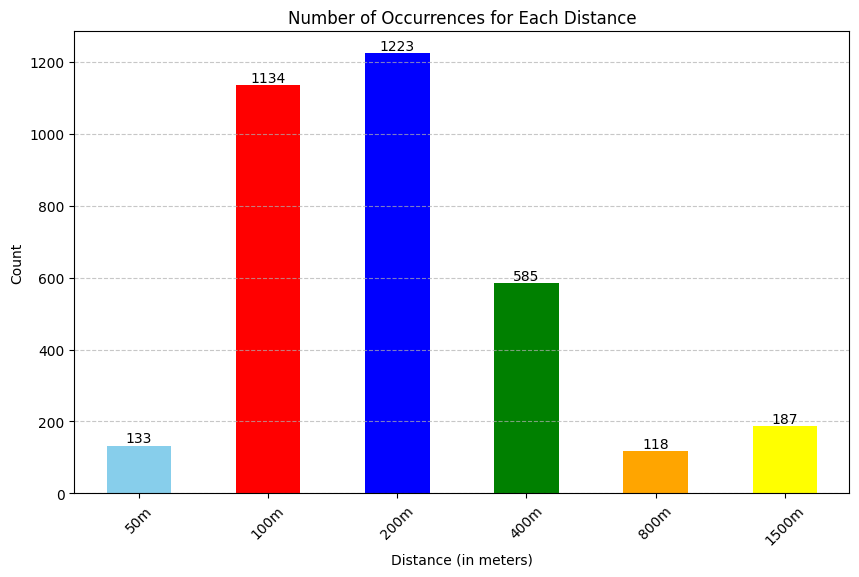

In [39]:
# Mapping of categorical values to their labels
distance_labels = {'50m': 0, '100m': 1, '200m': 2, '400m': 3, '800m': 4, '1500m': 5}

# Distance counts
distance_counts = df['Distance (in meters)'].value_counts().sort_index()

# Map numerical index to corresponding labels
distance_labels_sorted = distance_counts.index.map({v: k for k, v in distance_labels.items()})

# Create a bar chart
plt.figure(figsize=(10, 6))

for i, d_counts in enumerate(distance_counts):
    plt.text(i, d_counts, f'{d_counts}', ha='center', va='bottom')
    
distance_counts.plot(kind='bar', color=['skyblue','red','blue','green','orange','yellow'])

# Set x-axis labels
plt.xticks(range(len(distance_labels_sorted)), distance_labels_sorted)

plt.title('Number of Occurrences for Each Distance')
plt.xlabel('Distance (in meters)')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

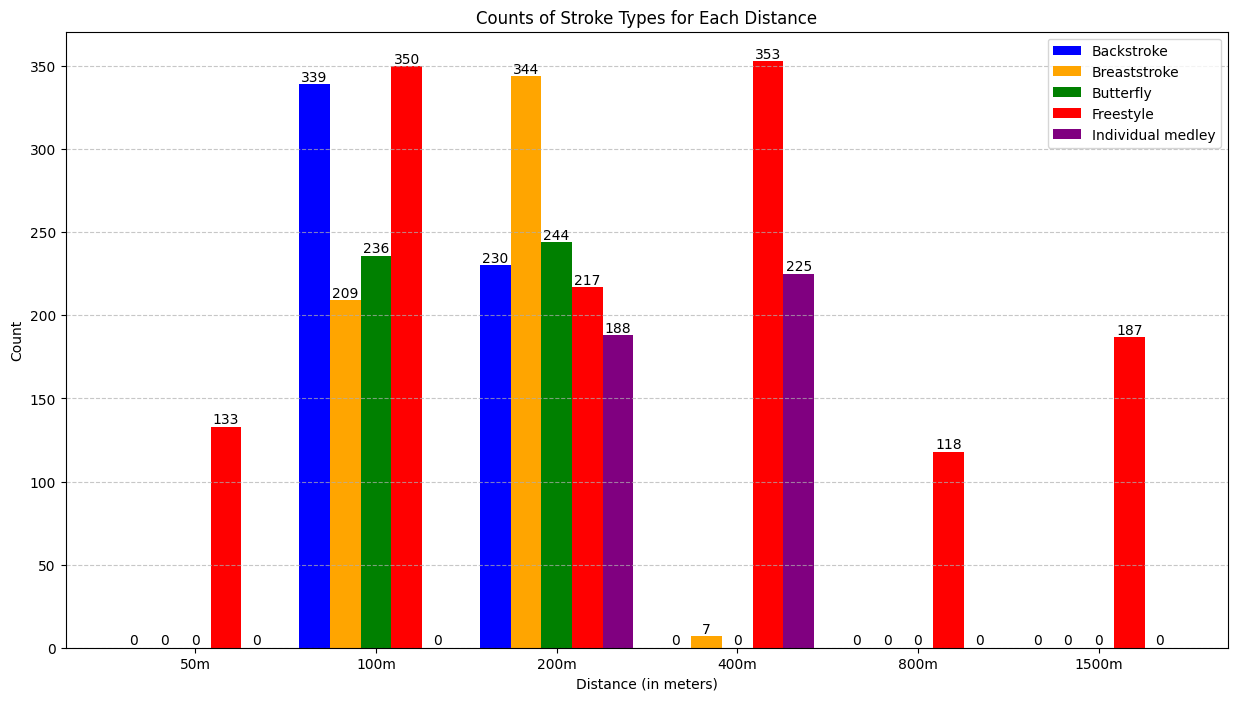

In [40]:
distance_labels = {'50m': 0, '100m': 1, '200m': 2, '400m': 3, '800m': 4, '1500m': 5}
stroke_labels = {'Backstroke': 0, 'Breaststroke': 1, 'Butterfly': 2, 'Freestyle': 3, 'Individual medley': 4}

# Group by 'Distance (in meters)' and 'Stroke' and count occurrences
counts_grouped = df.groupby(['Distance (in meters)', 'Stroke']).size().unstack(fill_value=0)

# Create a grouped bar chart
distance_values = np.arange(len(distance_labels))
bar_width = 0.17  # Width of each bar
colors = ['blue', 'orange', 'green', 'red', 'purple']

plt.figure(figsize=(15, 8))
    
for i, (stroke, idx) in enumerate(stroke_labels.items()):
    plt.bar(distance_values + i * bar_width, counts_grouped[idx], bar_width, label=stroke, color=colors[i])
    # Annotate counts on top of each bar
    for j, count in enumerate(counts_grouped[idx]):
        plt.text(j + i * bar_width, count, str(count), ha='center', va='bottom')

plt.xlabel('Distance (in meters)')
plt.ylabel('Count')
plt.title('Counts of Stroke Types for Each Distance')
plt.xticks(distance_values + bar_width * 2, distance_labels.keys())
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

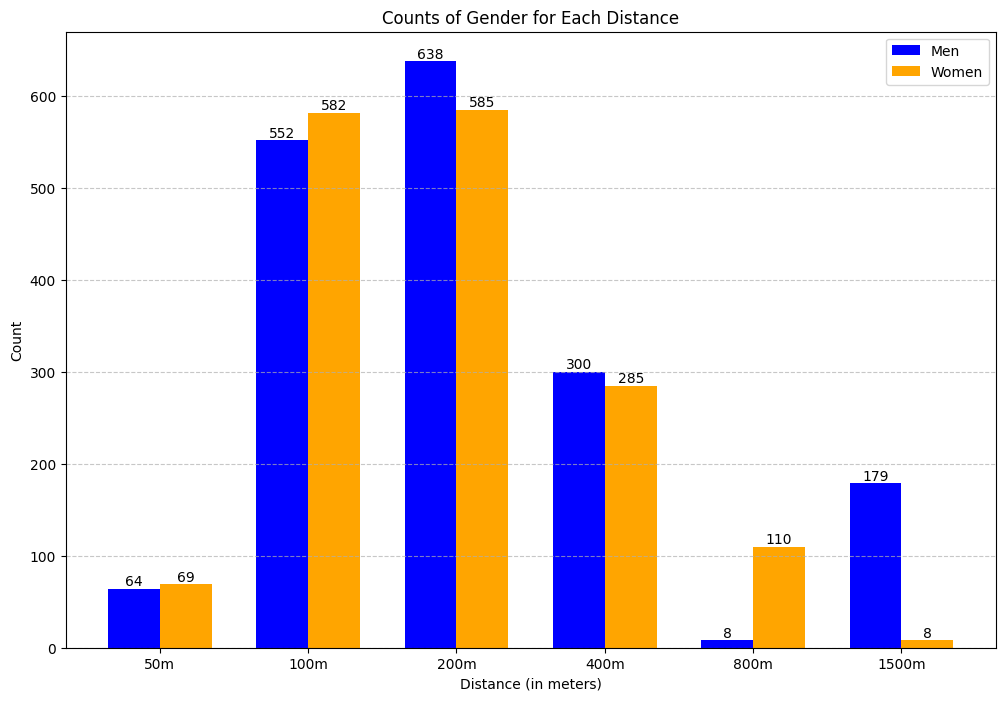

In [41]:
# Mapping of categorical values to their labels
distance_labels = {'50m': 0, '100m': 1, '200m': 2, '400m': 3, '800m': 4, '1500m': 5}
gender_labels = {'Men': 0, 'Women': 1}

# Group by 'Distance (in meters)' and 'Gender' and count occurrences
counts_grouped_gender = df.groupby(['Distance (in meters)', 'Gender']).size().unstack(fill_value=0)

# Create a grouped bar chart
distance_values = np.arange(len(distance_labels))
bar_width = 0.35  # Width of each bar
colors = ['blue', 'orange']

plt.figure(figsize=(12, 8))

for i, (gender, idx) in enumerate(gender_labels.items()):
    plt.bar(distance_values + i * bar_width, counts_grouped_gender[idx], bar_width, label=gender, color=colors[i])
    # Annotate counts on top of each bar
    for j, count in enumerate(counts_grouped_gender[idx]):
        plt.text(j + i * bar_width, count, str(count), ha='center', va='bottom')

plt.xlabel('Distance (in meters)')
plt.ylabel('Count')
plt.title('Counts of Gender for Each Distance')
plt.xticks(distance_values + bar_width / 2, distance_labels.keys())
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\sukan\AppData\Local\Temp\ipykernel_13728\722527147.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Distance (in meters)', y='age', data=df, palette='Set2')


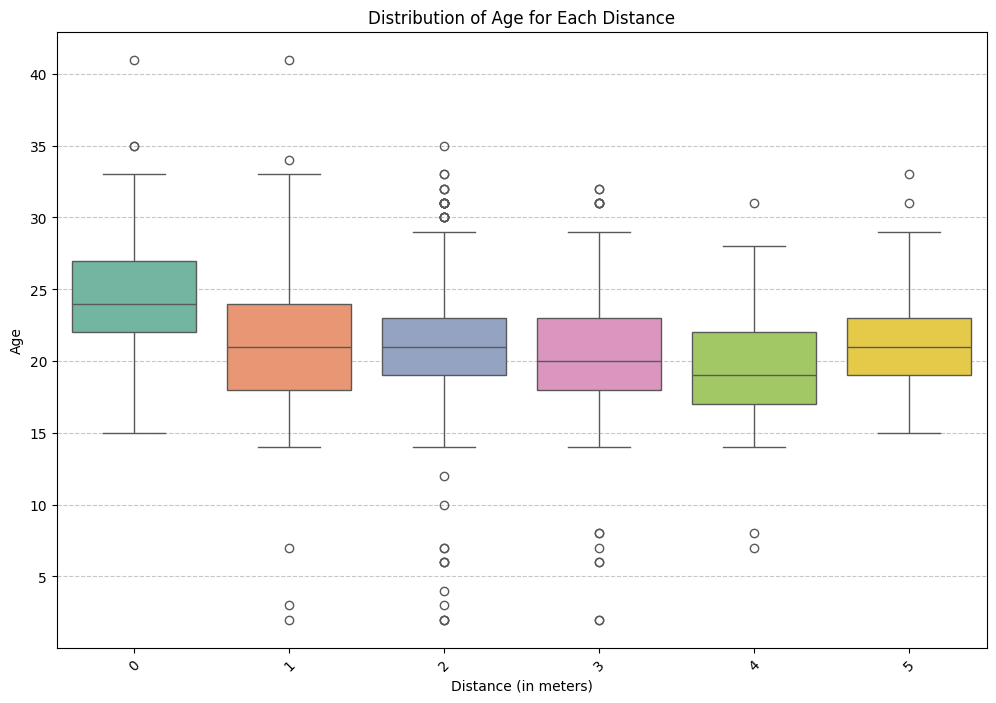

In [42]:
# Create box plots for each distance
plt.figure(figsize=(12, 8))
sns.boxplot(x='Distance (in meters)', y='age', data=df, palette='Set2')
plt.title('Distribution of Age for Each Distance')
plt.xlabel('Distance (in meters)')
plt.ylabel('Age')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### From the above boxplot we can analyze that there are some outliers in age. This is because in some of the cases, the age value is not properly follows the characteristics of the age category. We can see age below 5 are impossible in olympics

C:\Users\sukan\AppData\Local\Temp\ipykernel_13728\1169939079.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Distance (in meters)', y='Results', data=df, palette='Set2')


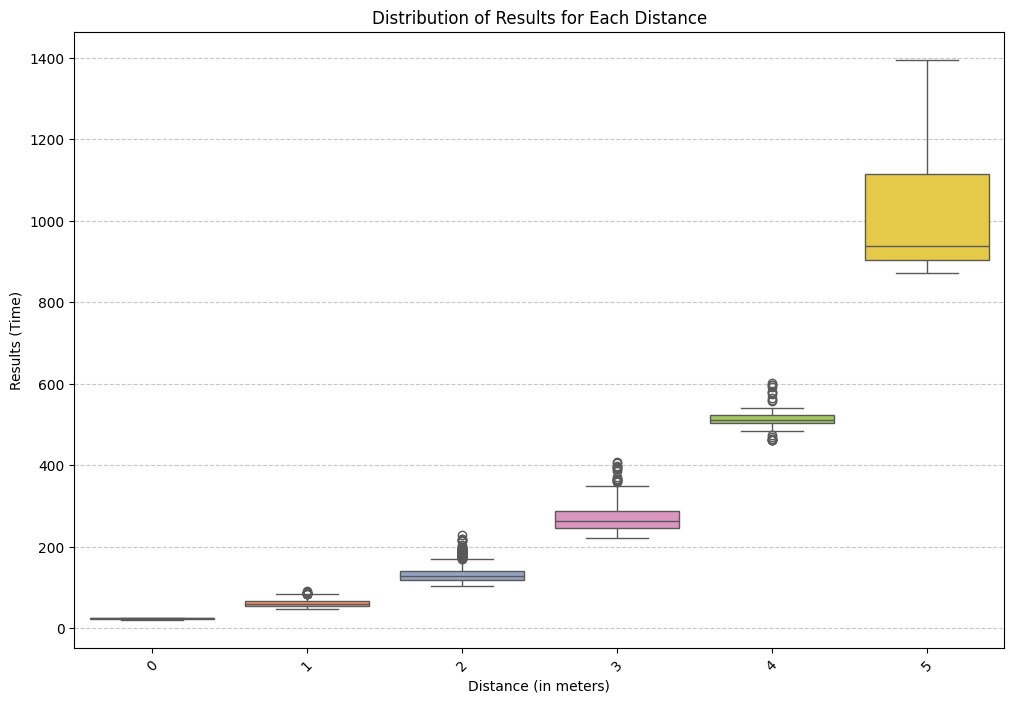

In [43]:
# Create box plots for each distance
plt.figure(figsize=(12, 8))
sns.boxplot(x='Distance (in meters)', y='Results', data=df, palette='Set2')
plt.title('Distribution of Results for Each Distance')
plt.xlabel('Distance (in meters)')
plt.ylabel('Results (Time)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Now we analyze stroke column

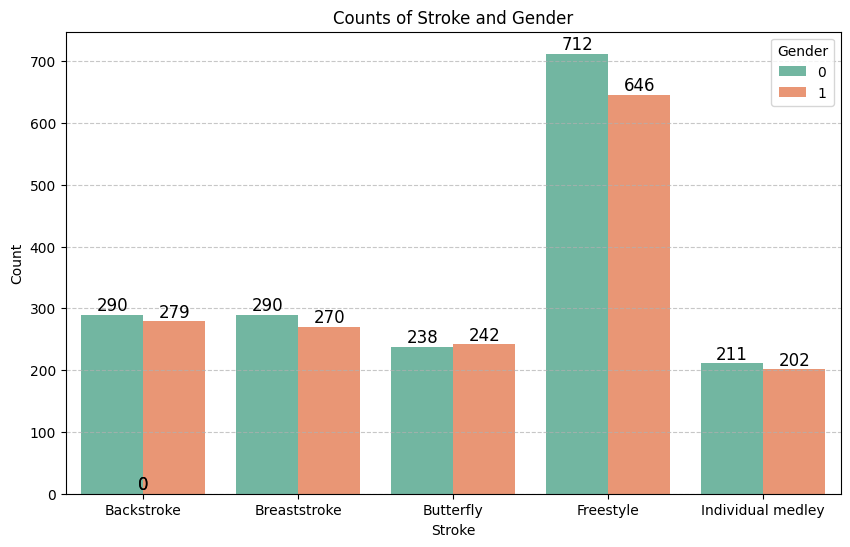

In [44]:
# Create a count plot for each combination of stroke and gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Stroke', hue='Gender', data=df, palette='Set2')
# Add annotations on top of each bar
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()), 
             fontsize=12, color='black', ha='center', va='bottom')
plt.title('Counts of Stroke and Gender')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.xticks(range(len(stroke_labels)), stroke_labels.keys())
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Gender')
plt.show()

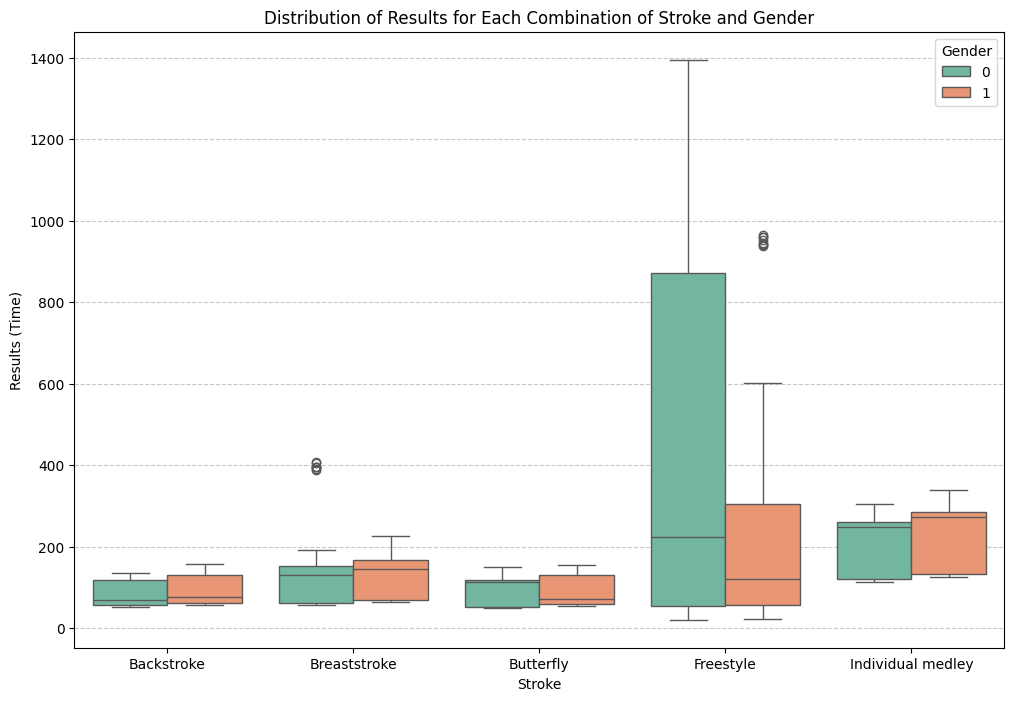

In [45]:
# Create grouped box plots for each combination of stroke and gender
plt.figure(figsize=(12, 8))
sns.boxplot(x='Stroke', y='Results', hue='Gender', data=df, palette='Set2')
plt.title('Distribution of Results for Each Combination of Stroke and Gender')
plt.xlabel('Stroke')
plt.ylabel('Results (Time)')
plt.xticks(range(len(stroke_labels)), stroke_labels.keys())
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Gender')
plt.show()

C:\Users\sukan\AppData\Local\Temp\ipykernel_13728\87111754.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Stroke', y='age', data=df, palette='Set2')


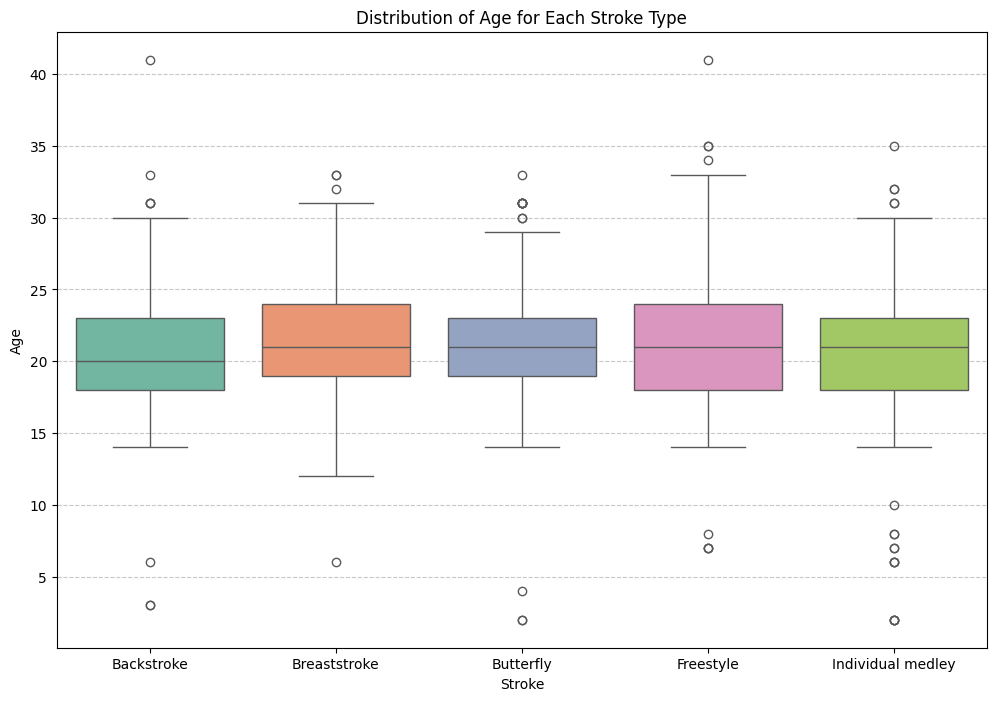

In [46]:
# Create box plots for each stroke type
plt.figure(figsize=(12, 8))
sns.boxplot(x='Stroke', y='age', data=df, palette='Set2')
plt.title('Distribution of Age for Each Stroke Type')
plt.xlabel('Stroke')
plt.ylabel('Age')
plt.xticks(range(len(stroke_labels)), stroke_labels.keys())
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Now we do with Age

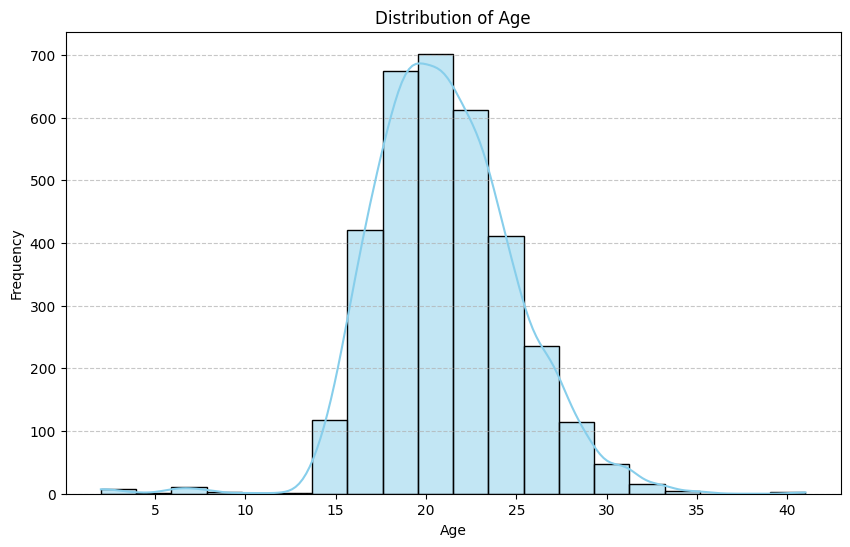

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, color='skyblue',kde=True, edgecolor='black')  # Adjust the number of bins as needed
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### From the above histogram for age, we can analyze that the age are distrubuted normally even if there are some outliers

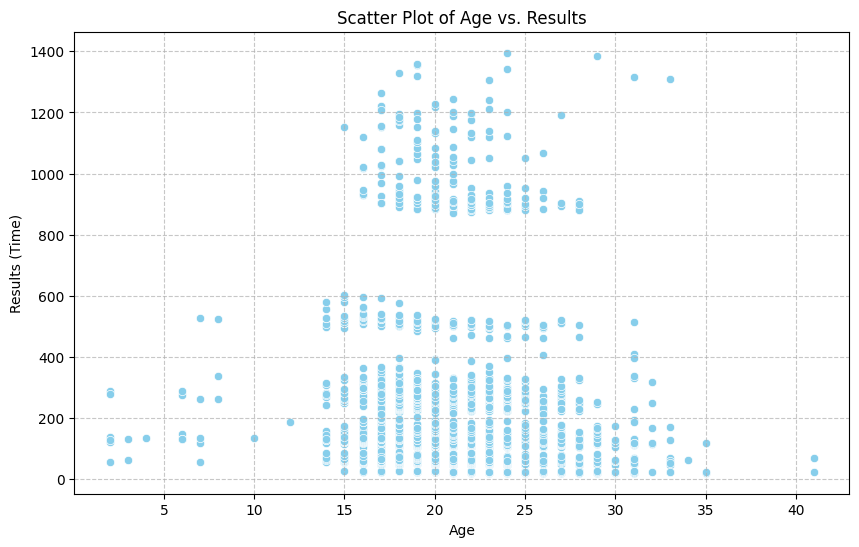

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='Results', data=df, color='skyblue')
plt.title('Scatter Plot of Age vs. Results')
plt.xlabel('Age')
plt.ylabel('Results (Time)')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()


#### The above scatter plot visualizes the data points of age with respect to reults. 

### Now we see for Result column

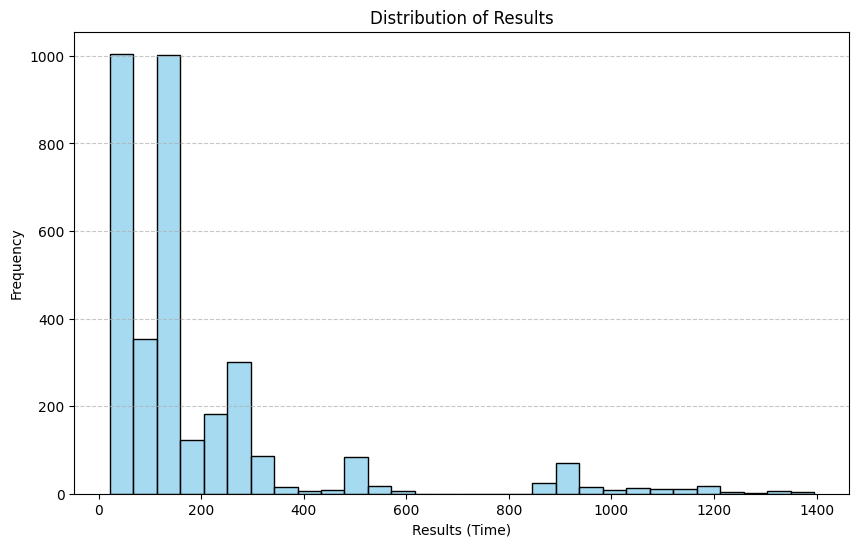

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Results'], bins=30, color='skyblue', kde=False, edgecolor='black')
plt.title('Distribution of Results')
plt.xlabel('Results (Time)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### The above graph illustrates about the distribution of result values in the dataset, showing which result values are more common and which are less common.

The x-axis represents the result values (times), typically measured in seconds or another appropriate unit.
The y-axis represents the frequency or count of observations falling within each result value range.

### Finally we visualize the correlation matrix

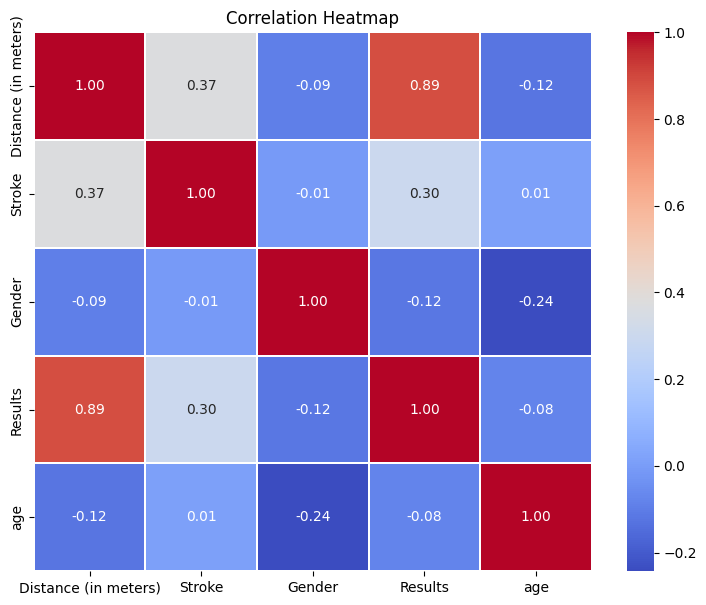

In [50]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot using heatmap
plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.05)
plt.title('Correlation Heatmap')
plt.show()

# Now we split the data into training and testing sets

In [51]:
df.head()

,Distance (in meters),Stroke,Gender,Results,age
0,1,0,0,51.98,24.0
1,1,0,0,52.00,20.0
2,1,0,0,52.19,25.0
4,1,0,0,52.51,25.0
5,1,0,0,52.78,21.0


In [52]:
X = np.array(df.drop(['Results'], axis=1))   #independant

In [53]:
y = np.array(df['Results'])   #dependant var

In [54]:
print(X.shape, y.shape)

(3380, 4) (3380,)


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [56]:
print(f"Training Set: X_train {X_train.shape}, y_train {y_train.shape}")
print(f"Testing Set: X_train {X_test.shape}, y_train {y_test.shape}")

Training Set: X_train (2704, 4), y_train (2704,)
Testing Set: X_train (676, 4), y_train (676,)


# Standardization

##### after we split the dataset into training and testing sets, we need to standardize the data. 
Since all the columns are in different magnitudes (i.e., results in seconds, age in Natural numbers upto a range of 41, distance and stroke are in categorical, we standardize the dataset into single magnitude.

Standardization is a data preprocessing technique used to transform the features of a dataset to have a mean of 0 and a standard deviation of 1. It is also known as Z-score normalization.

After standardization, the mean of the feature becomes 0, and the standard deviation becomes 1.
Standardization is useful in machine learning for several reasons:

Feature Scaling: It ensures that all features are on the same scale, preventing features with large magnitudes from dominating those with smaller magnitudes during model training.

Convergence: It can help gradient descent algorithms converge faster during optimization.

Interpretability: It simplifies the interpretation of coefficients in linear models because the standardized coefficients represent the change in the target variable corresponding to a one-standard-deviation change in the predictor variable.

In [57]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [58]:
joblib.dump(scaler, 'scaler_obj.joblib')

['scaler_obj.joblib']

In [59]:
print(X_train_scaled)

[[ 0.89296     0.66929546  1.04077132  1.02969185]
 [ 0.00915186 -1.60810588  1.04077132 -1.557214  ]
 [-0.87465628 -1.60810588 -0.96082587 -0.78114224]
 ...
 [ 2.66057629  0.66929546 -0.96082587 -0.78114224]
 [-0.87465628 -0.08983832  1.04077132 -0.00507049]
 [ 0.89296     0.66929546 -0.96082587  0.77100127]]


In [60]:
print(X_test_scaled)

[[ 1.77676815  0.66929546  1.04077132  1.28838244]
 [ 0.00915186 -0.08983832  1.04077132 -0.78114224]
 [-0.87465628  0.66929546 -0.96082587  0.77100127]
 ...
 [-0.87465628  0.66929546 -0.96082587  1.02969185]
 [-1.75846443  0.66929546  1.04077132  0.2536201 ]
 [-0.87465628 -0.8489721  -0.96082587 -0.00507049]]


# Model Selection

### 1. Linear Regression

In [61]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression

# Define the parameter grid for Linear Regression
param_grid_lr = {
    # Linera Regression has no fine-tunable parameters
}

# Create a Linear Regression model
lr = LinearRegression()

# Perform grid search with cross-validation
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='neg_mean_squared_error')
grid_search_lr.fit(X_train_scaled, y_train)

# Get the best parameters
best_params_lr = grid_search_lr.best_params_
print("Best Parameters for Linear Regression:", best_params_lr)

# Get the best Linear Regression model
best_lr = grid_search_lr.best_estimator_

# Evaluate the best Linear Regression model on the test set
lr_prediction = best_lr.predict(X_test_scaled)


Best Parameters for Linear Regression: {}


In [62]:
# Calculate Mean Squared Error
mse_lr = mean_squared_error(y_test, lr_prediction)

# Calculate Mean Absolute Error
mae_lr = mean_absolute_error(y_test, lr_prediction)

# Calculate Root Mean Squared Error
rmse_lr = mean_squared_error(y_test, lr_prediction, squared=False)

# Calculate R² score
r2_lr = r2_score(y_test, lr_prediction)

# Evaluate the best Linear Regression model using cross-validation
cv_scores_lr = cross_val_score(best_lr, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse_lr = -cv_scores_lr.mean()

# Create a DataFrame to display the results
results_lr = pd.DataFrame({
    'Metric': ['Mean Squared Error', 'Mean Absolute Error', 'Root Mean Squared Error', 'R² Score', '5-Fold CV MSE'],
    'Value': [mse_lr, mae_lr, rmse_lr, r2_lr, cv_mse_lr]
})

print("Evaluation Metrics for Linear Regression:\n")
print(results_lr)

Evaluation Metrics for Linear Regression:

                    Metric         Value
0       Mean Squared Error  10774.726953
1      Mean Absolute Error     78.208414
2  Root Mean Squared Error    103.801382
3                 R² Score      0.794621
4            5-Fold CV MSE  10890.246712


C:\Users\sukan\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [63]:
# Save Model
joblib.dump(best_lr, 'models/lr_model.pkl')

['models/lr_model.pkl']

### 2. Ridge Regression

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Define the parameter grid for Ridge Regression
param_grid_ridge = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Create a Ridge Regression model
ridge = Ridge()

# Perform grid search with cross-validation
grid_search_ridge = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train_scaled, y_train)

# Get the best parameters
best_params_ridge = grid_search_ridge.best_params_
print("Best Parameters for Ridge Regression:", best_params_ridge)

# Get the best Ridge Regression model
best_ridge = grid_search_ridge.best_estimator_

# Evaluate the best Ridge Regression model on the test set
ridge_prediction = best_ridge.predict(X_test_scaled)


Best Parameters for Ridge Regression: {'alpha': 1}


In [65]:
# Calculate Mean Squared Error
mse_ridge = mean_squared_error(y_test, ridge_prediction)

# Calculate Mean Absolute Error
mae_ridge = mean_absolute_error(y_test, ridge_prediction)

# Calculate Root Mean Squared Error
rmse_ridge = mean_squared_error(y_test, ridge_prediction, squared=False)

# Calculate R² score
r2_ridge = r2_score(y_test, ridge_prediction)

# Evaluate the best Linear Regression model using cross-validation
cv_scores_ridge = cross_val_score(best_ridge, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse_ridge = -cv_scores_ridge.mean()

# Create a DataFrame to display the results
results_ridge = pd.DataFrame({
    'Metric': ['Mean Squared Error', 'Mean Absolute Error', 'Root Mean Squared Error', 'R² Score', '5-Fold CV MSE'],
    'Value': [mse_ridge, mae_ridge, rmse_ridge, r2_ridge, cv_mse_ridge]
})

print("Evaluation Metrics for Ridge Regression:\n")
print(results_ridge)

Evaluation Metrics for Ridge Regression:

                    Metric         Value
0       Mean Squared Error  10773.669356
1      Mean Absolute Error     78.177625
2  Root Mean Squared Error    103.796288
3                 R² Score      0.794641
4            5-Fold CV MSE  10890.231532


C:\Users\sukan\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [66]:
# Save Model
joblib.dump(best_ridge, 'models/ridge_model.pkl')

['models/ridge_model.pkl']

### 3. Lasso Regression

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# Define the parameter grid for Lasso Regression
param_grid_lasso = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Create a Lasso Regression model
lasso = Lasso()

# Perform grid search with cross-validation
grid_search_lasso = GridSearchCV(lasso, param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train_scaled, y_train)

# Get the best parameters
best_params_lasso = grid_search_lasso.best_params_
print("Best Parameters for Lasso Regression:", best_params_lasso)

# Get the best Lasso Regression model
best_lasso = grid_search_lasso.best_estimator_

# Evaluate the best Lasso Regression model on the test set
lasso_prediction = best_lasso.predict(X_test_scaled)


Best Parameters for Lasso Regression: {'alpha': 0.001}


In [68]:
# Calculate Mean Squared Error
mse_lasso = mean_squared_error(y_test, lasso_prediction)

# Calculate Mean Absolute Error
mae_lasso = mean_absolute_error(y_test, lasso_prediction)

# Calculate Root Mean Squared Error
rmse_lasso = mean_squared_error(y_test, lasso_prediction, squared=False)

# Calculate R² score
r2_lasso = r2_score(y_test, lasso_prediction)

# Evaluate the best Linear Regression model using cross-validation
cv_scores_lasso = cross_val_score(best_lasso, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse_lasso = -cv_scores_lasso.mean()

# Create a DataFrame to display the results
results_lasso = pd.DataFrame({
    'Metric': ['Mean Squared Error', 'Mean Absolute Error', 'Root Mean Squared Error', 'R² Score', '5-Fold CV MSE'],
    'Value': [mse_lasso, mae_lasso, rmse_lasso, r2_lasso, cv_mse_lasso]
})

print("Evaluation Metrics for Lasso Regression:\n")
print(results_lasso)

Evaluation Metrics for Lasso Regression:

                    Metric         Value
0       Mean Squared Error  10774.709415
1      Mean Absolute Error     78.208088
2  Root Mean Squared Error    103.801298
3                 R² Score      0.794621
4            5-Fold CV MSE  10890.246816


C:\Users\sukan\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [69]:
# Save Model
joblib.dump(best_lasso, 'models/lasso_model.pkl')

['models/lasso_model.pkl']

### 4. Decision Tree Regressor

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Define the parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Decision Tree model
dt = DecisionTreeRegressor(random_state=1234)

# Perform grid search with cross-validation
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='neg_mean_squared_error')
grid_search_dt.fit(X_train_scaled, y_train)

# Get the best parameters
best_params_dt = grid_search_dt.best_params_
print("Best Parameters for Decision Tree:", best_params_dt)

# Get the best Decision Tree model
best_dt = grid_search_dt.best_estimator_

# Evaluate the best Decision Tree model on the test set
dt_prediction = best_dt.predict(X_test_scaled)


Best Parameters for Decision Tree: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [71]:
# Calculate Mean Squared Error
mse_dt = mean_squared_error(y_test, dt_prediction)

# Calculate Mean Absolute Error
mae_dt = mean_absolute_error(y_test, dt_prediction)

# Calculate Root Mean Squared Error
rmse_dt = mean_squared_error(y_test, dt_prediction, squared=False)

# Calculate R² score
r2_dt = r2_score(y_test, dt_prediction)

# Evaluate the best Linear Regression model using cross-validation
cv_scores_dt = cross_val_score(best_dt, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse_dt = -cv_scores_dt.mean()

# Create a DataFrame to display the results
results_dt = pd.DataFrame({
    'Metric': ['Mean Squared Error', 'Mean Absolute Error', 'Root Mean Squared Error', 'R² Score', '5-Fold CV MSE'],
    'Value': [mse_dt, mae_dt, rmse_dt, r2_dt, cv_mse_dt]
})

print("Evaluation Metrics for Decision Tree Regression:\n")
print(results_dt)

Evaluation Metrics for Decision Tree Regression:

                    Metric        Value
0       Mean Squared Error  1195.122925
1      Mean Absolute Error    16.421045
2  Root Mean Squared Error    34.570550
3                 R² Score     0.977220
4            5-Fold CV MSE  1266.347479


C:\Users\sukan\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [72]:
# Save Model
joblib.dump(best_dt, 'models/dt_model.pkl')

['models/dt_model.pkl']

### 5. Random Forest Regressor

In [73]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

# Define the parameter grid for Random Forest
param_dist_rf = {
    'n_estimators': randint(10, 100),
    'max_features': ['log2', 'sqrt'],
    'max_depth': [3, 5, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a Random Forest model
rf = RandomForestRegressor(random_state=1234)

# Perform randomized search with cross-validation
random_search_rf = RandomizedSearchCV(rf, param_distributions=param_dist_rf, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=1234)
random_search_rf.fit(X_train_scaled, y_train)

# Get the best parameters
best_params_rf = random_search_rf.best_params_
print("Best Parameters for Random Forest:", best_params_rf)

# Get the best Random Forest model
best_rf = random_search_rf.best_estimator_

# Evaluate the best Random Forest model on the test set
rf_prediction = best_rf.predict(X_test_scaled)


Best Parameters for Random Forest: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 77}


In [74]:
# Calculate Mean Squared Error
mse_rf = mean_squared_error(y_test, rf_prediction)

# Calculate Mean Absolute Error
mae_rf = mean_absolute_error(y_test, rf_prediction)

# Calculate Root Mean Squared Error
rmse_rf = mean_squared_error(y_test, rf_prediction, squared=False)

# Calculate R² score
r2_rf = r2_score(y_test, rf_prediction)

# Evaluate the best Linear Regression model using cross-validation
cv_scores_rf = cross_val_score(best_rf, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse_rf = -cv_scores_rf.mean()

# Create a DataFrame to display the results
results_rf = pd.DataFrame({
    'Metric': ['Mean Squared Error', 'Mean Absolute Error', 'Root Mean Squared Error', 'R² Score', '5-Fold CV MSE'],
    'Value': [mse_rf, mae_rf, rmse_rf, r2_rf, cv_mse_rf]
})

print("Evaluation Metrics for Random Forest Regression:\n")
print(results_rf)

C:\Users\sukan\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Evaluation Metrics for Random Forest Regression:

                    Metric        Value
0       Mean Squared Error  1197.659685
1      Mean Absolute Error    15.518114
2  Root Mean Squared Error    34.607220
3                 R² Score     0.977171
4            5-Fold CV MSE  1326.660524


In [75]:
# Save Model
joblib.dump(best_rf, 'models/rf_model.pkl')

['models/rf_model.pkl']

### Neural Network Model

In [76]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [83]:
def create_nn_model(learning_rate=0.001, dropout_rate=0.2, regularization_strength=0.01):
    model = Sequential()
    model.add(Dense(32, input_dim=4, kernel_initializer='normal', kernel_regularizer=tf.keras.regularizers.l2(regularization_strength), activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(16, kernel_initializer='normal', kernel_regularizer=tf.keras.regularizers.l2(regularization_strength), activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='linear'))  # Linear activation for regression

    # Compile model with fine-tuned parameters
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    
    return model

In [84]:
# Create the neural network regression model
nn_model = create_nn_model()

C:\Users\sukan\anaconda3\envs\myenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [85]:
print(nn_model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 32)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 705 (2.75 KB)

 Trainable params: 705 (2.75 KB)

 Non-trainable params: 0 (0.00 B)

None


In [86]:
# Evaluate the model
nn_prediction = nn_model.predict(X_test_scaled)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [87]:
from sklearn.model_selection import KFold
import numpy as np

# Define the number of folds for cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds)

# Lists to store evaluation metrics for each fold
mse_scores = []
mae_scores = []
rmse_scores = []
r2_scores = []

# Perform cross-validation
for train_index, test_index in kf.split(X_train_scaled):
    X_train_cv, X_val_cv = X_train_scaled[train_index], X_train_scaled[test_index]
    y_train_cv, y_val_cv = y_train[train_index], y_train[test_index]

    # Train the model
    nn_model.fit(X_train_cv, y_train_cv, epochs=100, batch_size=10, verbose=0)

    # Predict on the validation set
    y_pred_val = nn_model.predict(X_val_cv)

    # Calculate evaluation metrics for this fold
    mse_fold = mean_squared_error(y_val_cv, y_pred_val)
    mae_fold = mean_absolute_error(y_val_cv, y_pred_val)
    rmse_fold = root_mean_squared_error(y_val_cv, y_pred_val)
    r2_fold = r2_score(y_val_cv, y_pred_val)

    # Append the scores to the lists
    mse_scores.append(mse_fold)
    mae_scores.append(mae_fold)
    rmse_scores.append(rmse_fold)
    r2_scores.append(r2_fold)

# Calculate the mean of each evaluation metric
mse_cv_mean = np.mean(mse_scores)
mae_cv_mean = np.mean(mae_scores)
rmse_cv_mean = np.mean(rmse_scores)
r2_cv_mean = np.mean(r2_scores)

# Print the mean evaluation metrics
print("Mean Squared Error (CV):", mse_cv_mean)
print("Mean Absolute Error (CV):", mae_cv_mean)
print("Root Mean Squared Error (CV):", rmse_cv_mean)
print("R-squared Score (CV):", r2_cv_mean)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Mean Squared Error (CV): 1537.730395018727
Mean Absolute Error (CV): 19.297598070717445
Root Mean Squared Error (CV): 38.891835960430775
R-squared Score (CV): 0.9700875490819391


In [88]:
# Save NN model
nn_model.save('models/nn_model.h5')

##### Finetuned Neural Network Model

In [91]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import kerastuner as kt

# Define the function to create the neural network model
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_1', min_value=32, max_value=512, step=32),
                    input_dim=4,
                    activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(units=hp.Int('units_2', min_value=32, max_value=512, step=32),
                    activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout_2', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(units=1, activation='linear'))

    optimizer = Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4]))
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])
    return model

# Instantiate the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=3,
    directory='keras_tuner',
    project_name='neural_network_regression')

# Perform hyperparameter tuning
tuner.search(X_train_scaled, y_train, epochs=100, validation_data=(X_test_scaled, y_test))


# Get the best hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:")
print(best_hyperparameters)

# Get the best model
finetuned_nn_model = tuner.get_best_models(num_models=1)[0]
print("Finetuned NN Model Summary:")
print(finetuned_nn_model.summary())

# Evaluate the best model
finetuned_nn_prediction = finetuned_nn_model.predict(X_test_scaled)
mse_finetuned_nn = mean_squared_error(y_test, finetuned_nn_prediction)
mae_finetuned_nn = mean_absolute_error(y_test, finetuned_nn_prediction)
rmse_finetuned_nn = root_mean_squared_error(y_test, finetuned_nn_prediction)
r2_finetuned_nn = r2_score(y_test, finetuned_nn_prediction)

# Print evaluation results
print("Mean Squared Error:", mse_finetuned_nn)
print("Mean Absolute Error:", mae_finetuned_nn)
print("Root Mean Squared Error:", rmse_finetuned_nn)
print("R-squared Score:", r2_finetuned_nn)


Trial 5 Complete [00h 01m 10s]
val_loss: 1180.1551920572917

Best val_loss So Far: 1180.1551920572917
Total elapsed time: 00h 06m 00s
Best Hyperparameters:
Finetuned NN Model Summary:


C:\Users\sukan\anaconda3\envs\myenv\lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 192)                 │             960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 192)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 320)                 │          61,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 320)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             321 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 63,041 (246.25 KB)

 Trainable params: 63,041 (246.25 KB)

 Non-trainable params: 0 (0.00 B)

None
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Mean Squared Error: 1170.1017782579488
Mean Absolute Error: 15.395000623669143
Root Mean Squared Error: 34.20675047790931
R-squared Score: 0.9776964575447024


In [92]:
finetuned_nn_model.save('models/finetuned_nn_model.h5')

In [93]:
y_pred_nn = finetuned_nn_model.predict(X_test_scaled)

# Round the predicted values to two decimal places
y_pred_nn_rounded = np.round(y_pred_nn, 2)

print(y_pred_nn_rounded)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[[ 481.68]
 [ 136.5 ]
 [  55.31]
 [  61.38]
 [ 121.57]
 [ 120.32]
 [ 142.51]
 [  58.63]
 [ 249.09]
 [ 259.3 ]
 [  21.81]
 [ 270.13]
 [ 131.94]
 [ 277.89]
 [  63.47]
 [ 257.15]
 [ 122.83]
 [  80.32]
 [ 124.25]
 [ 282.41]
 [ 149.45]
 [ 270.13]
 [  62.04]
 [ 111.29]
 [ 144.29]
 [ 122.46]
 [  67.15]
 [  66.63]
 [ 527.87]
 [ 262.02]
 [ 125.65]
 [  72.38]
 [  66.68]
 [  69.68]
 [ 128.48]
 [ 134.27]
 [ 147.05]
 [  62.71]
 [  55.84]
 [ 111.29]
 [  53.89]
 [ 128.32]
 [  66.68]
 [  64.49]
 [  54.19]
 [  66.52]
 [1011.67]
 [ 277.8 ]
 [  56.44]
 [  61.38]
 [ 945.53]
 [ 118.  ]
 [ 287.54]
 [ 287.54]
 [  22.54]
 [ 137.69]
 [1004.18]
 [ 147.05]
 [  61.25]
 [ 133.16]
 [ 249.09]
 [ 122.82]
 [ 142.51]
 [  66.65]
 [  21.43]
 [ 145.66]
 [  54.48]
 [  22.92]
 [ 481.68]
 [ 115.75]
 [  52.39]
 [ 279.34]
 [ 264.8 ]
 [ 267.07]
 [  55.31]
 [  23.38]
 [ 256.57]
 [ 291.15]
 [ 128.48]
 [ 121.57]
 [  64.63]
 [ 974.25]
 [  56.07]
 [1004.18]
 [ 153.42]
 [  54.19]
 [ 133.86]
 [ 

# Model Comparision

In [94]:
import joblib
from keras.models import load_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load ML models
ml_model_filenames = ["lr_model.pkl", "ridge_model.pkl", "lasso_model.pkl", "dt_model.pkl", "rf_model.pkl"]
nn_model_filename = "finetuned_nn_model.h5"

ml_models = [joblib.load(f'models/{filename}') for filename in ml_model_filenames]
nn_model = load_model(f'models/{nn_model_filename}')

# Function to evaluate a model and return metrics
def evaluate_model(model, X_test_scaled, y_test):
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, mae, rmse, r2

# Evaluate ML models
ml_model_metrics = [evaluate_model(model, X_test_scaled, y_test) for model in ml_models]

# Evaluate deep learning model
y_pred_nn = finetuned_nn_model.predict(X_test_scaled)
y_pred_nn = np.round(y_pred_nn, 2)
mse_nn = mean_squared_error(y_test, y_pred_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
rmse_nn = root_mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

# Combine results for plotting
model_names = ["Linear Regression", "Ridge Regression", "Lasso Regression", "Decision Tree Regressor", "Random Forest Regressor", "Neural Network"]
mse = [metric[0] for metric in ml_model_metrics] + [mse_nn]
mae = [metric[1] for metric in ml_model_metrics] + [mae_nn]
rmse = [metric[2] for metric in ml_model_metrics] + [rmse_nn]
r2_scores = [metric[3] for metric in ml_model_metrics] + [r2_nn]

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [95]:
print("MSE: ",mse)
print("MAE: ", mae)
print("RMSE: ", rmse)
print("R2_SCORES: ",r2_scores)

MSE:  [10774.726952616764, 10773.669356460801, 10774.709415352821, 1195.1229252192666, 1197.65968509857, 1170.1005964066394]
MAE:  [78.20841437050994, 78.1776251519285, 78.20808787084486, 16.42104476099963, 15.518113749720268, 15.395000124259811]
RMSE:  [103.8013822288353, 103.796287777843, 103.80129775370258, 34.57054996986982, 34.60722012959969, 34.206733202786836]
R2_SCORES:  [0.7946207889798191, 0.7946409480302568, 0.7946211232610911, 0.9772195244916111, 0.9771711708075828, 0.9776964800722049]


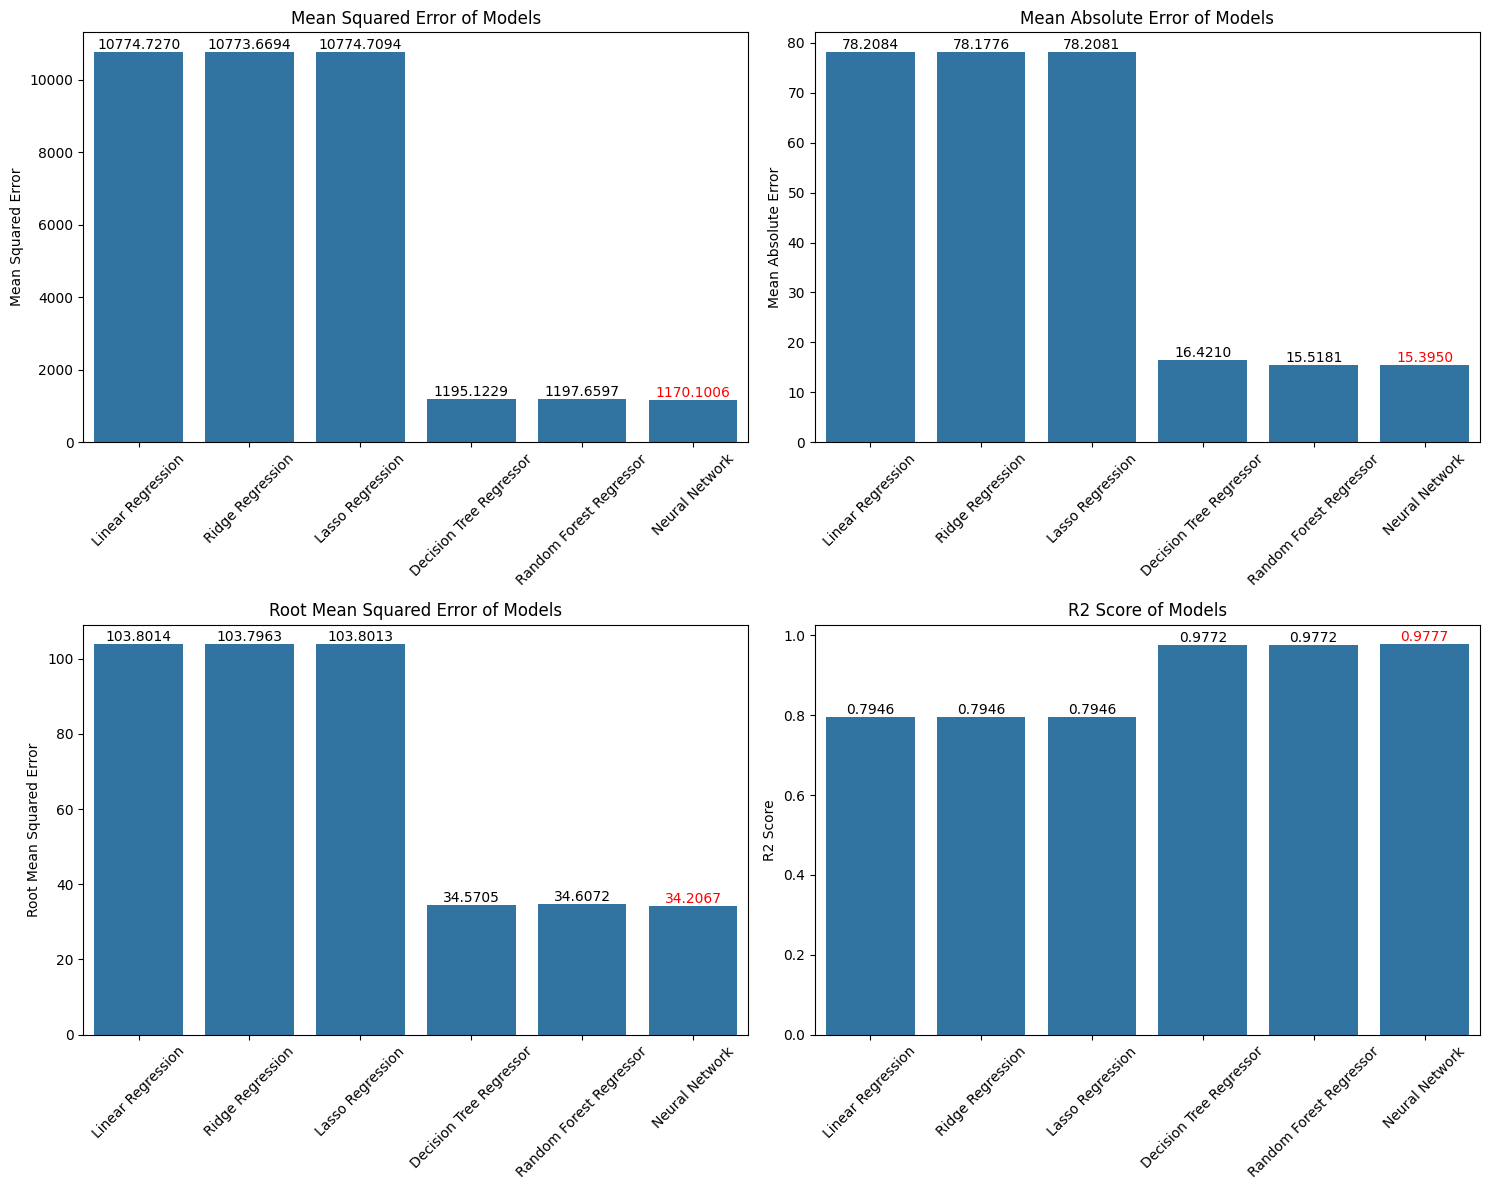

In [96]:
# Plotting
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
sns.barplot(x=model_names, y=mse)
plt.title('Mean Squared Error of Models')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)

# Adding mse values on bars
min_mse = np.min(mse)
for i, mse_ in enumerate(mse):
    color = 'red' if mse_ == min_mse else 'black'
    plt.text(i, mse_, f'{mse_:.4f}', ha='center', va='bottom', color=color)


plt.subplot(2, 2, 2)
sns.barplot(x=model_names, y=mae)
plt.title('Mean Absolute Error of Models')
plt.ylabel('Mean Absolute Error')
plt.xticks(rotation=45)

#Adding mae values on bars
min_mae = np.min(mae)
for i, mae_ in enumerate(mae):
    color = 'red' if mae_ == min_mae else 'black'
    plt.text(i, mae_, f'{mae_:.4f}', ha='center', va='bottom', color=color)


plt.subplot(2, 2, 3)
sns.barplot(x=model_names, y=rmse)
plt.title('Root Mean Squared Error of Models')
plt.ylabel('Root Mean Squared Error')
plt.xticks(rotation=45)

# Adding rmse values on bars
min_rmse = np.min(rmse)
for i, rmse_ in enumerate(rmse):
    color = 'red' if rmse_ == min_rmse else 'black'
    plt.text(i, rmse_, f'{rmse_:.4f}', ha='center', va='bottom', color=color)
    

plt.subplot(2, 2, 4)
sns.barplot(x=model_names, y=r2_scores)
plt.title('R2 Score of Models')
plt.ylabel('R2 Score')
plt.xticks(rotation=45)

# Adding r2_score values on bars
max_r2 = np.max(r2_scores)
for i, r2 in enumerate(r2_scores):
    color = 'red' if r2 == max_r2 else 'black'
    plt.text(i, r2, f'{r2:.4f}', ha='center', va='bottom', color=color)
    

plt.tight_layout()
plt.show()
